<a href="https://colab.research.google.com/github/Phatdeluxe/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module3-databackedassertions/LS_DS_113_Making_Data_backed_Assertions_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

Try and isolate the main relationships and then communicate them using crosstabs and graphs. Share any cool graphs that you make with the rest of the class in Slack!

In [1]:
# Installing an earlier version of pandas because of pandas 0.24.2 problem with crosstab

!pip install pandas==0.23.4

In [2]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself

# Importing pandas, checking that the file was uploaded sucessfully, and droping the unnessecary indexing column
import pandas as pd
persons = pd.read_csv('https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-1-Dealing-With-Data/master/module3-databackedassertions/persons.csv')
persons = persons.drop(['Unnamed: 0'], axis=1)
persons.head()

,age,weight,exercise_time
0,44,118,192
1,41,161,35
2,46,128,220
3,39,216,57
4,28,116,182


In [3]:
# Checking version to see if I will run into the crosstab error. The error only 
# happes if you are using 2 variables, but not for 3.

pd.__version__

'0.23.4'

In [4]:
persons.describe()

,age,weight,exercise_time
count,1200.000000,1200.000000,1200.000000
mean,48.396667,153.540833,134.910833
std,18.166802,35.132182,85.548895
min,18.000000,100.000000,0.000000
25%,33.000000,125.000000,65.000000
50%,48.000000,149.000000,122.000000
75%,64.000000,180.250000,206.000000
max,80.000000,246.000000,300.000000


In [5]:
# Checking for NaN values

persons.isna().sum()

age              0
weight           0
exercise_time    0
dtype: int64

In [6]:
# Messed around with the crosstabs a bit. Without bining everything, the crosstab gets way too big.
# Even with the bins it is still a little hard to read, but it will do

ageBins = pd.cut(persons['age'], 5)
timeBins = pd.cut(persons['exercise_time'], 6)
weightBins = pd.cut(persons['weight'], 6)

pd.crosstab(weightBins, [ageBins, timeBins], normalize='columns')

age                (17.938, 30.4]      ...         (67.6, 80.0]
exercise_time        (-0.3, 50.0]      ...       (200.0, 250.0]
weight                                 ...                     
(99.854, 124.333]        0.139535      ...                 0.25
(124.333, 148.667]       0.186047      ...                 0.50
(148.667, 173.0]         0.139535      ...                 0.25
(173.0, 197.333]         0.209302      ...                 0.00
(197.333, 221.667]       0.209302      ...                 0.00
(221.667, 246.0]         0.116279      ...                 0.00

[6 rows x 29 columns]

In [7]:
pd.crosstab(weightBins, timeBins, normalize='columns')

exercise_time,"(-0.3, 50.0]","(50.0, 100.0]","(100.0, 150.0]","(150.0, 200.0]","(200.0, 250.0]","(250.0, 300.0]"
weight,,,,,,
"(99.854, 124.333]",0.141079,0.159091,0.262887,0.268421,0.296774,0.448718
"(124.333, 148.667]",0.153527,0.178030,0.139175,0.326316,0.406452,0.435897
"(148.667, 173.0]",0.153527,0.238636,0.252577,0.231579,0.270968,0.115385
"(173.0, 197.333]",0.195021,0.170455,0.211340,0.163158,0.025806,0.000000
"(197.333, 221.667]",0.215768,0.234848,0.134021,0.010526,0.000000,0.000000
"(221.667, 246.0]",0.141079,0.018939,0.000000,0.000000,0.000000,0.000000


In [13]:
pd.crosstab(ageBins, timeBins, normalize='columns')


exercise_time,"(-0.3, 50.0]","(50.0, 100.0]","(100.0, 150.0]","(150.0, 200.0]","(200.0, 250.0]","(250.0, 300.0]"
age,,,,,,
"(17.938, 30.4]",0.178423,0.155303,0.190722,0.278947,0.322581,0.205128
"(30.4, 42.8]",0.190871,0.155303,0.185567,0.221053,0.258065,0.307692
"(42.8, 55.2]",0.128631,0.151515,0.164948,0.178947,0.193548,0.358974
"(55.2, 67.6]",0.182573,0.212121,0.175258,0.194737,0.200000,0.128205
"(67.6, 80.0]",0.319502,0.325758,0.283505,0.126316,0.025806,0.000000


In [0]:
# Importing files for 3d graphing and to upload a gif of the 3d graph rotated

import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg
import plotly as py
from mpl_toolkits import mplot3d
from google.colab import files

In [9]:
uploaded = files.upload()

# The graph should be saved in files. Google Colab does not support .gif files in 
# the code, so if you want to see it you will have to find it in the files tab

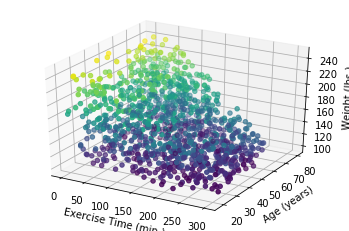

In [10]:
# Plotting the three variables on a 3d graph

fig = plt.figure()
ax = plt.axes(projection='3d')


z = persons['weight']
y = persons['age']
x = persons['exercise_time']

ax.set_xlabel('Exercise Time (min.)')
ax.set_ylabel('Age (years)')
ax.set_zlabel('Weight (lbs.)')

ax.scatter3D(x, y, z, c=z, cmap='viridis');

Text(0.5, 0, 'Age (years)')

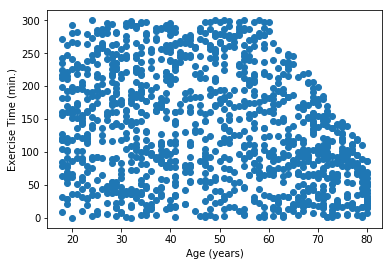

In [11]:
# 2d graph of age and exercise time for better clarity over the non-interactable 3d graph

fig1 = plt.figure
ax1 = plt.axes()
ax1.scatter(y, x);
ax1.set_ylabel('Exercise Time (min.)')
ax1.set_xlabel('Age (years)')

Text(0, 0.5, 'Weight (lbs.)')

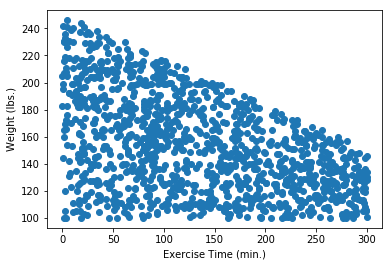

In [12]:
# Same as above, but exercise time and weight

fig2 = plt.figure
ax2 = plt.axes()
ax2.scatter(x, z);
ax2.set_xlabel('Exercise Time (min.)')
ax2.set_ylabel('Weight (lbs.)')

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


### Assignment answers:

1. There is one continuous variable, age, and two discrete variables, which are exercise time and weight

2. Age has an impact on exercise time, but only at ages above 60, which declines by roughly 10 hrs per year. Exercise time has an impact on weight, the more you exercise the less you weigh.
 
3. The real relationship I would believe is the exercise time vs. age, because as you get older, you are not able to exercise as much due to the deterioration of your body. The spurious relationship is weight vs. exercise time, because body-builders exercise for many hours every day and come out over 300 lbs 

## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)